In [7]:
# Setup imports
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt

from engine.backtester import Backtester
from strategies.rsi_breakout import RSIBreakoutStrategy
from utils.metrics import CAGR, sharpe_ratio, max_drawdown, win_rate, profit_factor

In [8]:
# Load data
data_path = "../data/EURUSD.csv"
df = pd.read_csv(data_path)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = df['Date'].str.split(' ').str[0:2]
df['Date'] = df['Date'].str.join(' ')
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index, format = '%d.%m.%Y %H:%M:%S.%f')

In [9]:
# Add strategy signals
rsi_period = 14
overbought = 70
oversold = 30
average_window = 5
atr_window = 20
atr_sl = 0.5

df = RSIBreakoutStrategy(df, atr_window, atr_sl, rsi_period, average_window, overbought, oversold ).generate_signals()

In [10]:
# Run backtest
account_size = 100000
backtester = Backtester(df, account_size=account_size)
backtester.run()
trade_log = backtester.get_trade_log()

In [11]:
# Performance summary and metrics
if not trade_log.empty:
    trade_log['cumulative_sum'] = trade_log['Net PnL'].cumsum() + account_size
    print(trade_log.head())

    print("\n===== Performance Metrics =====")
    print(f"CAGR (%): {CAGR(trade_log, account_size)}")
    print(f"Sharpe Ratio: {sharpe_ratio(trade_log)}")
    print(f"Max Drawdown (%): {max_drawdown(trade_log)}")
    print(f"Win Rate (%): {win_rate(trade_log)}")
    print(f"Profit Factor: {profit_factor(trade_log)}")
else:
    print("No trades were executed.")

          Entry Time   Entry Price           Exit Time   Exit Price   Size   \
0 2024-04-24 01:30:00       1.07013 2024-04-24 05:30:00      1.07097  10000   
1 2024-05-01 20:30:00       1.06793 2024-05-01 21:30:00      1.06717  10000   
2 2024-05-03 09:30:00       1.07324 2024-05-03 13:30:00      1.07429  10000   
3 2024-05-23 12:30:00       1.08296 2024-05-23 13:30:00      1.08387  10000   
4 2024-05-28 10:30:00       1.08752 2024-05-28 13:30:00      1.08702  10000   

   Spread  Direction   Take Profit   Stop Loss   Net PnL Exit Type   \
0    10000       Sell      1.069428    1.070832    -10.4       Loss   
1    10000       Sell      1.067578    1.068282      5.6     Profit   
2    10000       Sell      1.072729    1.073751    -12.5       Loss   
3    10000        Buy      1.083352    1.082568      7.1     Profit   
4    10000       Sell      1.087193    1.087847      3.0     Profit   

   cumulative_sum  
0         99989.6  
1         99995.2  
2         99982.7  
3         99989.8 

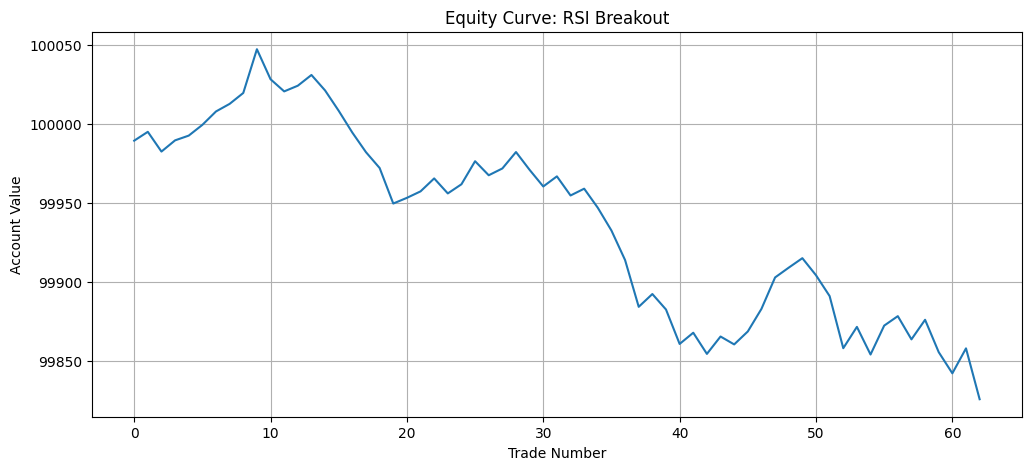

In [12]:
# Visualize results (Equity curve)
if not trade_log.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(trade_log['cumulative_sum'])
    plt.title("Equity Curve: RSI Breakout")
    plt.xlabel("Trade Number")
    plt.ylabel("Account Value")
    plt.grid()
    plt.show()